# Oraciones y clasificadores

In [33]:
DataX = open("./trainData.txt","r")
DataY = open("./trainClasses.txt","r")
DatatestX = open("./testData.txt","r")
DatatestY = open("./testClasses.txt","r")

def splitFile(File,List):
    for line in File:
        line = line.replace("\n","")
        List.append(line)
    

#Convertimos cada línea de nuestros archivos (separado por \n ) en una entrada de un vector
trainX= []
trainY= []
testX = []
testY = []

# Generamos la lista de oraciones y clases
splitFile(DataX,trainX)
splitFile(DataY,trainY)
splitFile(DatatestX,testX)
splitFile(DatatestY,testY)

# Cuantas oraciones y clases obtuvimos
print("Longitud datos de Entrenamiento")
print(len(trainX),len(trainY))
print("Longitud datos de Evaluación")
print(len(testX),len(testY))

DataX.close()
DataY.close()
DatatestX.close()
DatatestY.close()

Longitud datos de Entrenamiento
1566 1566
Longitud datos de Evaluación
671 671


# Modelo de Bernoulli

In [53]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report, make_scorer
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [47]:
#Creamos un Vectorizador
vectorizer = CountVectorizer()
#entrenamos nuestro vectorizador con nuestros datos de training 
#vectorizamos el test con el mismo vectorizador entrenado para que tengan las mismas dimensiones 
Xtrain = vectorizer.fit_transform(trainX)
Xtest=vectorizer.transform(testX)
#generamos nuestro clasificador
clf = BernoulliNB()
#entrenamos con nuestos modelo
clf.fit(Xtrain, trainY)
#predecimos nuestro dataset de test
Ypred=clf.predict(Xtest)

In [48]:
print('Accuracy: {}\n'.format(accuracy_score(Ypred,testY)))
print('Precision: {}\n'.format(precision_score(Ypred,testY, average='weighted')))
print('Recall: {}\n'.format(recall_score(Ypred,testY, average='weighted')))
print('F-score: {}\n'.format(f1_score(Ypred,testY, average='weighted')))
print('\nConfusion matrix: \n')
print(str(confusion_matrix(Ypred,testY)) + '\n')
print('Classification report: \n')
print(classification_report(Ypred,testY) + '\n')

Accuracy: 0.9180327868852459

Precision: 0.9538106547722489

Recall: 0.9180327868852459

F-score: 0.928805637852358


Confusion matrix: 

[[ 53   3]
 [ 52 563]]

Classification report: 

              precision    recall  f1-score   support

         DOM       0.50      0.95      0.66        56
       OTHER       0.99      0.92      0.95       615

    accuracy                           0.92       671
   macro avg       0.75      0.93      0.81       671
weighted avg       0.95      0.92      0.93       671




In [49]:
clf.get_params()

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

[[ 53  52]
 [  3 563]]


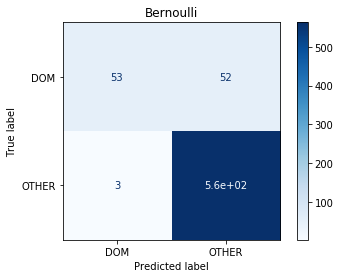

In [51]:
# Matriz de confusion para DOM y Other
print(confusion_matrix(testY, Ypred))
Bern = plot_confusion_matrix(clf, Xtest, testY, cmap=plt.cm.Blues, 
                      display_labels=["DOM","OTHER"])
Bern.ax_.set_title("Bernoulli")
Bern

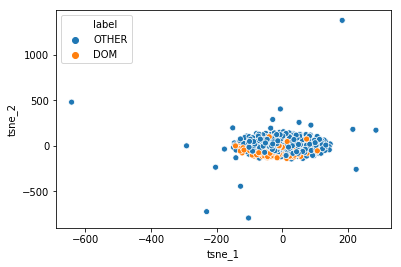

In [56]:
# podemos ver como se encuentran distribuidos los elementos de nuestro set de datos
X_test_embedded = TSNE(n_components=3).fit_transform(Xtest)
plt.figure()
tsne_result_df = pd.DataFrame({'tsne_1': X_test_embedded[:,0], 'tsne_2': X_test_embedded[:,1], 'label': testY})
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df)

# GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV
jobs = -1
crossV = 5
alpha=[]
#generamos 100 numeros del 0-1 para utilizar como alphas
for i in range(100):
    alpha.append(i/100) 
parameters = {'alpha' : alpha}
#generamos nuestro clasificador
Bernoulli = BernoulliNB()
#generamos nuestro objeto GridSearchCV con nuestro clasificador, verbouse es el numero de mensajes que imprime
clf_1 = GridSearchCV(Bernoulli, parameters,cv=crossV, n_jobs=jobs, verbose=10)
#entrenamos nuestro modelo
clf_1.fit(Xtrain, trainY)
#predecimos
Ypred=clf_1.predict(Xtest)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

In [59]:
print('Accuracy: {}\n'.format(accuracy_score(Ypred,testY)))
print('Precision: {}\n'.format(precision_score(Ypred,testY, average='weighted')))
print('Recall: {}\n'.format(recall_score(Ypred,testY, average='weighted')))
print('F-score: {}\n'.format(f1_score(Ypred,testY, average='weighted')))
print('\nConfusion matrix: \n')
print(str(confusion_matrix(Ypred,testY)) + '\n')
print('Classification report: \n')
print(classification_report(Ypred,testY) + '\n')
#obtenemos los mejores parametros
best_parameters = clf_1.best_estimator_.get_params()
for params in sorted(best_parameters.keys()):
  print("\t%s: %r\n" % (params, best_parameters[params]))

Accuracy: 0.9225037257824144

Precision: 0.9442278395878582

Recall: 0.9225037257824144

F-score: 0.9293262898387687


Confusion matrix: 

[[ 61   8]
 [ 44 558]]

Classification report: 

              precision    recall  f1-score   support

         DOM       0.58      0.88      0.70        69
       OTHER       0.99      0.93      0.96       602

    accuracy                           0.92       671
   macro avg       0.78      0.91      0.83       671
weighted avg       0.94      0.92      0.93       671


	alpha: 0.79

	binarize: 0.0

	class_prior: None

	fit_prior: True



[[ 61  44]
 [  8 558]]


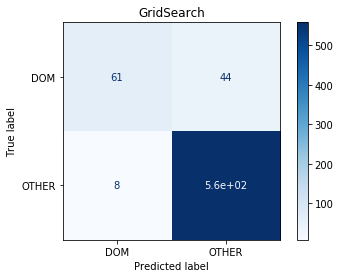

In [60]:
# Matriz de confusion para DOM y Other
print(confusion_matrix(testY, Ypred))
Grid = plot_confusion_matrix(clf_1, Xtest, testY, cmap=plt.cm.Blues, 
                      display_labels=["DOM","OTHER"])
Grid.ax_.set_title("GridSearch")
Grid

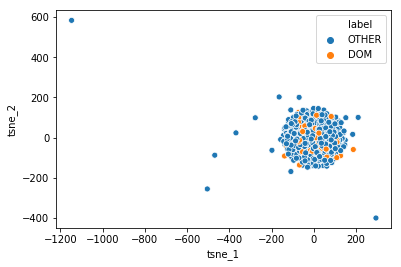

In [61]:
# podemos ver como se encuentran distribuidos los elementos de nuestro set de datos
X_test_embedded = TSNE(n_components=3).fit_transform(Xtest)
plt.figure()
tsne_result_df = pd.DataFrame({'tsne_1': X_test_embedded[:,0], 'tsne_2': X_test_embedded[:,1], 'label': testY})
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df)

# RandomizedSearchCV

In [62]:
from sklearn.model_selection import RandomizedSearchCV
import scipy
nIter = 100
#generamos una distribucion exponencial para nuestra alpha
paramGrid = {'alpha': scipy.stats.expon(scale=1.0)}
#generamos nuestro clasificador
Bernoulli = BernoulliNB()
#Generamos nuestro objeto GridSearchCV
clf_2 = RandomizedSearchCV(Bernoulli, paramGrid,n_iter=nIter,cv=crossV, n_jobs=jobs, verbose=10)
#entrenamos el modelo
clf_2.fit(Xtrain, trainY)
#Predecimos
Ypred=clf_2.predict(Xtest)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

In [63]:
print('Accuracy: {}\n'.format(accuracy_score(Ypred,testY)))
print('Precision: {}\n'.format(precision_score(Ypred,testY, average='weighted')))
print('Recall: {}\n'.format(recall_score(Ypred,testY, average='weighted')))
print('F-score: {}\n'.format(f1_score(Ypred,testY, average='weighted')))
print('\nConfusion matrix: \n')
print(str(confusion_matrix(Ypred,testY)) + '\n')
print('Classification report: \n')
print(classification_report(Ypred,testY) + '\n')
best_parameters = clf_2.best_estimator_.get_params()
for params in sorted(best_parameters.keys()):
    print("\t%s: %r\n" % (params, best_parameters[params]))

Accuracy: 0.9225037257824144

Precision: 0.9442278395878582

Recall: 0.9225037257824144

F-score: 0.9293262898387687


Confusion matrix: 

[[ 61   8]
 [ 44 558]]

Classification report: 

              precision    recall  f1-score   support

         DOM       0.58      0.88      0.70        69
       OTHER       0.99      0.93      0.96       602

    accuracy                           0.92       671
   macro avg       0.78      0.91      0.83       671
weighted avg       0.94      0.92      0.93       671


	alpha: 0.7907598911410253

	binarize: 0.0

	class_prior: None

	fit_prior: True



[[ 61  44]
 [  8 558]]


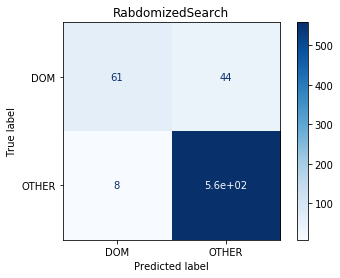

In [64]:
# Matriz de confusion para DOM y Other
print(confusion_matrix(testY, Ypred))
Rand = plot_confusion_matrix(clf_2, Xtest, testY, cmap=plt.cm.Blues, 
                      display_labels=["DOM","OTHER"])
Rand.ax_.set_title("RabdomizedSearch")
Rand

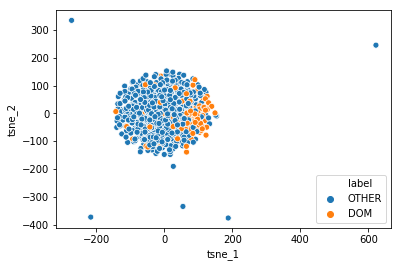

In [65]:
# podemos ver como se encuentran distribuidos los elementos de nuestro set de datos
X_test_embedded = TSNE(n_components=3).fit_transform(Xtest)
plt.figure()
tsne_result_df = pd.DataFrame({'tsne_1': X_test_embedded[:,0], 'tsne_2': X_test_embedded[:,1], 'label': testY})
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df)

# Lematización

## Generación de archivo con CoreNLP

In [15]:
#%%bash
# Tepeu
#java -Xmx2g edu.stanford.nlp.pipeline.StanfordCoreNLP -annotators tokenize,ssplit,pos,lemma -outputFormat conll -file trainData.txt

In [16]:
%%bash
head trainData.txt.conll

1	PgrR	pgrr	NN	_	_	_
2	,	,	,	_	_	_
3	Peptide	peptide	NN	_	_	_
4	glycan	glycan	NN	_	_	_
5	recycling	recycle	VBG	_	_	_
6	Regulator	Regulator	NNP	_	_	_
7	.	.	.	_	_	_

1	The	the	DT	_	_	_
2	transcriptional	transcriptional	JJ	_	_	_


## Longitud de los set de datos

Como CoreNLP regresa un archivo de oraciones en bloques, las dimensiones del archivo son muy diferentes a las de las oraciones. Por este motivo tenemos que transformar los archivos de CoreNLP en oraciones.

In [66]:
# Funcion para generar oraciones lematizadas
def generateLemma(LemmaFile):
    sentences = []
    sentence = ""
    for line in LemmaFile:
        if line == "\n":
            continue
        line = line.split("\t")
        if line[2] != ".":
            sentence = sentence + line[2] + " "
            continue
        if line[2] == ".":
            sentence = sentence + "."
            sentences.append(sentence)
            sentence = ""
            continue
            
    return sentences

# Función para generar las oraciones originales de entrada
def originalFile(LemmaFile):
    sentences = []
    sentence = ""
    for line in LemmaFile:
        if line == "\n":
            continue
        line = line.split("\t")
        if line[1] != ".":
            sentence = sentence + line[1] + " "
            continue
        if line[1] == ".":
            sentence = sentence + "."
            sentences.append(sentence)
            sentence = ""
            continue
            
    return sentences
        

Comparamos tamaños de cada lista de oraciones que generamos.
Como podemos observar se perdieron 2 entradas al utilizar CoreNLP, por lo que tendremos que ajustar nuestros datos.

In [67]:
# Generar lista de oraciones lematizadas
DataSetLemma = open("trainData.txt.conll","r")

DataLemma = generateLemma(DataSetLemma)
print(len(DataLemma))


1564


In [68]:
# Generar lista de oraciones originales de entrada
DataSetLemma2 = open("trainData.txt.conll","r")
OriginalFile = originalFile(DataSetLemma2)

print(len(OriginalFile))

1564


Observamos cuantos elementos unicos hay en los conjuntos de entrada y asociación.

In [69]:
print(len(set(DataSetX)))

1507


In [70]:
print(len(set(OriginalFile)))

1505


In [71]:
print(len(set(DataLemma)))

1502


Generamos una asociación entre las oraciones originales y su categoria.

In [72]:
# Hacer lista de tuplas entre oración y categoria
dataValues = []
DataSetLemma2 = open("trainData.txt.conll","r")
contador = 0
for element in DataSetX:
    Value = (element,DataSetY[contador])
    dataValues.append(Value)
    contador = contador + 1
    
len(dataValues)

1566

Ahora veremos que entradas podemos recuperar del archivo original, para poder igualar las longitudes con la cantidad de oraciones de los archivos lematizados.

In [73]:
# Encontrar oraciones del primer archivo en las oraciones originales que regreso CoreNLP
LemmaDataX = []
for sentence1 in DataSetX:
    if sentence1 not in OriginalFile:
        continue
    LemmaDataX.append(sentence1)
    
len(LemmaDataX)

1305

Ahora debemos asociar las categorias con estos 1305 resultados encontrados al intersectar el archivo de CoreNLP con el original.

In [74]:
LemmaDataY = []
for element in LemmaDataX:
    for values in dataValues:
        if element == values[0]:
            LemmaDataY.append(values[1])
            break
print(len(LemmaDataY))

1305


Ahora se debera generar una lista de tupplas que asocie las oraciones de los datos de entrada iniciales caputrados por CoreNLP y los lematizados

In [75]:
LemmaValues = []
contador = 0
# generar lista de tupplas para asociar originales con lematizados
for element in DataLemma:
    Value = (OriginalFile[contador],element)
    LemmaValues.append(Value)
    contador = contador + 1

    
len(LemmaValues)

1564

Finalmente obtenemos las oraciones lematizadas que CoreNLP capturo, de modo que tenemos las oraciones lematizadas y las categorias.

In [76]:
LemmaX = []

for values in LemmaValues:
    for element in LemmaDataX:
        if element == values[0]:
            LemmaX.append(values[1])
            break
        
print(len(LemmaX))

1305


Con los datos obtenidos con anterioridad finalmente generamos el modelo predictivo.

In [77]:
trainX = LemmaX
trainY = LemmaDataY

#como ya no son las mismas oraciones volvemos a entrenar al vectorizador
vectorizer = CountVectorizer()
XLemma = vectorizer.fit_transform(trainX)
Xtest=vectorizer.transform(testX)

In [78]:
paramGrid = {'alpha': scipy.stats.expon(scale=1.0)}
Bernoulli = BernoulliNB()
clf_3 = RandomizedSearchCV(Bernoulli, paramGrid,n_iter=nIter,cv=crossV, n_jobs=jobs, verbose=10)
clf_3.fit(XLemma, trainY)
Ypred=clf_3.predict(Xtest)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0583s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 346 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 388 ta

In [79]:
print('Accuracy: {}\n'.format(accuracy_score(Ypred,testY)))
print('Precision: {}\n'.format(precision_score(Ypred,testY, average='weighted')))
print('Recall: {}\n'.format(recall_score(Ypred,testY, average='weighted')))
print('F-score: {}\n'.format(f1_score(Ypred,testY, average='weighted')))
print('\nConfusion matrix: \n')
print(str(confusion_matrix(Ypred,testY)) + '\n')
print('Classification report: \n')
print(classification_report(Ypred,testY) + '\n')
best_parameters = clf_3.best_estimator_.get_params()
for params in sorted(best_parameters.keys()):
    print("\t%s: %r\n" % (params, best_parameters[params]))

Accuracy: 0.9135618479880775

Precision: 0.9490380673025637

Recall: 0.9135618479880775

F-score: 0.9246094360292748


Confusion matrix: 

[[ 52   5]
 [ 53 561]]

Classification report: 

              precision    recall  f1-score   support

         DOM       0.50      0.91      0.64        57
       OTHER       0.99      0.91      0.95       614

    accuracy                           0.91       671
   macro avg       0.74      0.91      0.80       671
weighted avg       0.95      0.91      0.92       671


	alpha: 0.8069544078060596

	binarize: 0.0

	class_prior: None

	fit_prior: True



[[ 52  53]
 [  5 561]]


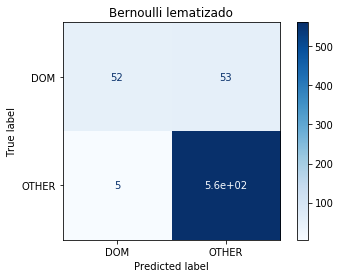

In [80]:
# Matriz de confusion para DOM y Other
print(confusion_matrix(testY, Ypred))
BernL = plot_confusion_matrix(clf_3, Xtest, testY, cmap=plt.cm.Blues, 
                      display_labels=["DOM","OTHER"])
BernL.ax_.set_title("Bernoulli lematizado")
BernL

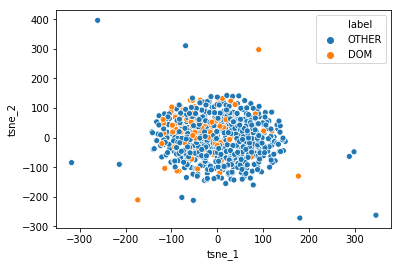

In [81]:
# podemos ver como se encuentran distribuidos los elementos de nuestro set de datos
X_test_embedded = TSNE(n_components=3).fit_transform(Xtest)
plt.figure()
tsne_result_df = pd.DataFrame({'tsne_1': X_test_embedded[:,0], 'tsne_2': X_test_embedded[:,1], 'label': testY})
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df)

# MultinomialNB

In [82]:
from sklearn.naive_bayes import MultinomialNB
paramGrid = {'alpha': scipy.stats.expon(scale=1.0)}
Multinomial = MultinomialNB()
clf_multi = RandomizedSearchCV(Multinomial, paramGrid,n_iter=nIter,cv=crossV, n_jobs=jobs, verbose=10)
clf_multi.fit(XLemma, trainY)
Ypred=clf_multi.predict(Xtest)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0585s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 346 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 388 ta

In [83]:
print('Accuracy: {}\n'.format(accuracy_score(Ypred,testY)))
print('Precision: {}\n'.format(precision_score(Ypred,testY, average='weighted')))
print('Recall: {}\n'.format(recall_score(Ypred,testY, average='weighted')))
print('F-score: {}\n'.format(f1_score(Ypred,testY, average='weighted')))
print('\nConfusion matrix: \n')
print(str(confusion_matrix(Ypred,testY)) + '\n')
print('Classification report: \n')
print(classification_report(Ypred,testY) + '\n')
best_parameters = clf_multi.best_estimator_.get_params()
for params in sorted(best_parameters.keys()):
    print("\t%s: %r\n" % (params, best_parameters[params]))

Accuracy: 0.9269746646795827

Precision: 0.9489719147600165

Recall: 0.9269746646795827

F-score: 0.9336280704787886


Confusion matrix: 

[[ 62   6]
 [ 43 560]]

Classification report: 

              precision    recall  f1-score   support

         DOM       0.59      0.91      0.72        68
       OTHER       0.99      0.93      0.96       603

    accuracy                           0.93       671
   macro avg       0.79      0.92      0.84       671
weighted avg       0.95      0.93      0.93       671


	alpha: 2.15067189880474

	class_prior: None

	fit_prior: True



[[ 62  43]
 [  6 560]]


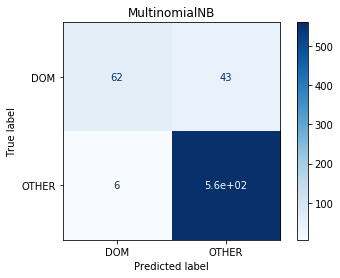

In [84]:
# Matriz de confusion para DOM y Other
print(confusion_matrix(testY, Ypred))
Multi = plot_confusion_matrix(clf_multi, Xtest, testY, cmap=plt.cm.Blues, 
                      display_labels=["DOM","OTHER"])
Multi.ax_.set_title("MultinomialNB")
Multi

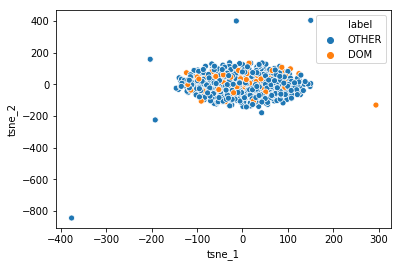

In [85]:
# podemos ver como se encuentran distribuidos los elementos de nuestro set de datos
X_test_embedded = TSNE(n_components=3).fit_transform(Xtest)
plt.figure()
tsne_result_df = pd.DataFrame({'tsne_1': X_test_embedded[:,0], 'tsne_2': X_test_embedded[:,1], 'label': testY})
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df)